# **Predictive Analytics for Identifying High-Risk Employees for Turnover Based on Compensation Factors**
## **Project Overview**
- **Author**: Zain Nizar Yousaf
- **Date**: 2024


### **Introduction to the Project**
The goal of this project is to predict high-risk employees for turnover based on compensation factors, such as salary, overtime, bonuses, and other compensation-related data. 
High turnover can be costly for organizations, so predictive analytics will be used to identify employees most likely to leave, allowing for targeted interventions to retain talent.


### **Goal of the Project**
The main goal of this project is to create a model that predicts employees who are at risk of leaving, based on compensation-related factors.

Key objectives:
- **Predict high-risk employees**: We want to identify employees who are likely to leave.
- **Target interventions**: Once we identify the high-risk employees, we can suggest ways to retain them.
- **Optimize compensation**: This model will help in making decisions about compensation and benefits.

Key metrics for performance evaluation:
- **Accuracy**: How well the model predicts turnover.
- **Precision**: How often the model's positive predictions (employee turnover) are correct.
- **Recall**: How many actual turnovers were caught by the model.
- **F1-Score**: A balance between precision and recall.



### **Data Story**
The dataset we’re using contains information on employees such as their:
- **Personal Information**: Employee name (but we won’t use it for predictions).
- **Job Information**: Role, department, and workgroup.
- **Compensation Data**: Salary, overtime pay, longevity pay, etc.
- **Turnover**: Whether the employee stayed or left (our target variable).

The goal is to analyze these features to see which compensation factors are related to turnover and predict which employees might leave.



In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\ZAIN NIZAR YOUSAF\\Downloads\\employee(in).csv")

# Display the first few rows of the dataset
df.head()


,Person Name,Organization,Job,Work Group,Gross Wages,Base Salary,Longevity Pay,Overtime,Other,Seperation Pay,Annual Buybacks,PERS Contributions,ER Paid,Other Benefits,Year Ending
0,"Amis, Beatrice J.",PN - Neighborhood Services,Front Desk/Cashier,HRLY,"$8,122.36","$8,122.36",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$1,218.35",12/31/2012 0:00
1,"Blight, Linda A.",PN - Neighborhood Services,Instructor 3,HRLY,"$3,516.25","$3,516.25",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$527.44,12/31/2012 0:00
2,"Bowden, Tim",PW - Environmental,Sr Maintenance Mechanic,CEA,"$86,965.55","$76,514.36","$7,651.57",$127.02,$125.00,$0.00,"$2,547.60","$21,235.98",$0.00,"$14,349.32",12/31/2012 0:00
3,"Burton, Robert",PN - Parks & Recreation,Monitor,HRLY,"$4,232.29","$4,232.29",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$634.84,12/31/2012 0:00
4,"Cisneros, Alejandro",PN - Parks & Recreation,Instructor 3,HRLY,"$1,120.00","$1,120.00",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$168.00,12/31/2012 0:00


### **Initial Insights**
By inspecting the first few rows, we can see the structure of the dataset. The features include employee-related information and compensation details. It’s clear that this data will allow us to explore how compensation factors are related to turnover.

We will proceed with data cleaning and exploratory analysis to better understand the patterns in the data.


In [17]:
# Basic description of the dataset
df.describe()

# Information on column types, non-null values, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22115 entries, 0 to 22114
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Person Name         22115 non-null  object
 1   Organization        22115 non-null  object
 2   Job                 22115 non-null  object
 3   Work Group          22115 non-null  object
 4   Gross Wages         22111 non-null  object
 5   Base Salary         22104 non-null  object
 6   Longevity Pay       15370 non-null  object
 7   Overtime            16213 non-null  object
 8   Other               17887 non-null  object
 9   Seperation Pay      11433 non-null  object
 10  Annual Buybacks     14803 non-null  object
 11  PERS Contributions  15547 non-null  object
 12  ER Paid             18863 non-null  object
 13  Other Benefits      22115 non-null  object
 14  Year Ending         22115 non-null  object
dtypes: object(15)
memory usage: 2.5+ MB


Total Entries: 22115
Total Columns: 15

Data Types:
Object (15 columns)
Key Columns
Person Name
Organization	
Job	Work Group	
Gross Wages	
Base Salary	
Longevity Pay	
Overtime	
Other	
Seperation Pay	
Annual Buybacks	
PERS Contributions	
ER Paid	
Other Benefits	
Year Ending

In [18]:
# Check for missing values
df.isnull().sum()


Person Name               0
Organization              0
Job                       0
Work Group                0
Gross Wages               4
Base Salary              11
Longevity Pay          6745
Overtime               5902
Other                  4228
Seperation Pay        10682
Annual Buybacks        7312
PERS Contributions     6568
ER Paid                3252
Other Benefits            0
Year Ending               0
dtype: int64

In [19]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Remove duplicates if any
df = df.drop_duplicates()


##  outliers in numerical columns using boxplots

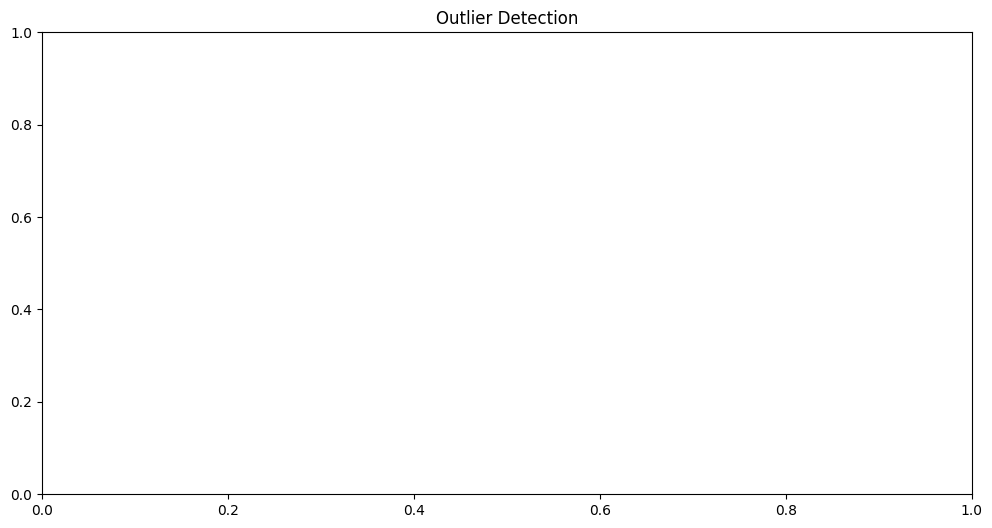

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in numerical columns using boxplots
numerical_columns = ['Gross Wages', 'Base Salary', 'Longevity Pay', 'Overtime', 'Other']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Outlier Detection")
plt.show()


In [23]:
import pandas as pd

# 1. Function to clean and convert currency columns
def clean_and_convert(column):
    # Remove '$', ',' and convert parentheses to negative values
    column = column.replace({'\$': '', ',': '', r'\(': '-', r'\)': ''}, regex=True).str.strip()
    
    # Convert to numeric, setting errors='coerce' to convert invalid strings to NaN
    return pd.to_numeric(column, errors='coerce')

# 2. Identify the currency columns (those with object dtype)
# We will exclude columns that do not contain currency data (like 'Person Name' and 'Year Ending')
columns_to_clean = df.select_dtypes(include=['object']).columns

# 3. Apply the cleaning function to each relevant column (skipping non-numeric columns)
for col in columns_to_clean:
    if col not in ['Person Name', 'Year Ending']:  # Skip non-currency columns
        df[col] = clean_and_convert(df[col])

# 4. Now check the data types and confirm conversion
print("Data types after cleaning:\n", df.dtypes)

# 5. Check the cleaned data
print("\nCleaned data:\n", df.head())




Data types after cleaning:
 Person Name            object
Organization          float64
Job                   float64
Work Group            float64
Gross Wages           float64
Base Salary           float64
Longevity Pay         float64
Overtime              float64
Other                 float64
Seperation Pay        float64
Annual Buybacks       float64
PERS Contributions    float64
ER Paid               float64
Other Benefits        float64
Year Ending            object
dtype: object

Cleaned data:
            Person Name  Organization  Job  Work Group  Gross Wages  \
0    Amis, Beatrice J.           NaN  NaN         NaN      8122.36   
1     Blight, Linda A.           NaN  NaN         NaN      3516.25   
2          Bowden, Tim           NaN  NaN         NaN     86965.55   
3       Burton, Robert           NaN  NaN         NaN      4232.29   
4  Cisneros, Alejandro           NaN  NaN         NaN      1120.00   

   Base Salary  Longevity Pay  Overtime  Other  Seperation Pay  \
0    

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ZAIN NIZAR YOUSAF\AppData\Local\Temp\ipykernel_7908\1980479992.py:7: SyntaxWarning: invalid escape sequence '\$'
  column = column.replace({'\$': '', ',': '', r'\(': '-', r'\)': ''}, regex=True).str.strip()



Skewness of numerical columns:
 Organization               NaN
Job                        NaN
Work Group                 NaN
Gross Wages           0.377812
Base Salary           0.120774
Longevity Pay         0.589945
Overtime              2.286441
Other                 5.833872
Seperation Pay        7.764420
Annual Buybacks       8.772524
PERS Contributions    0.274322
ER Paid               0.752878
Other Benefits        3.160047
dtype: float64


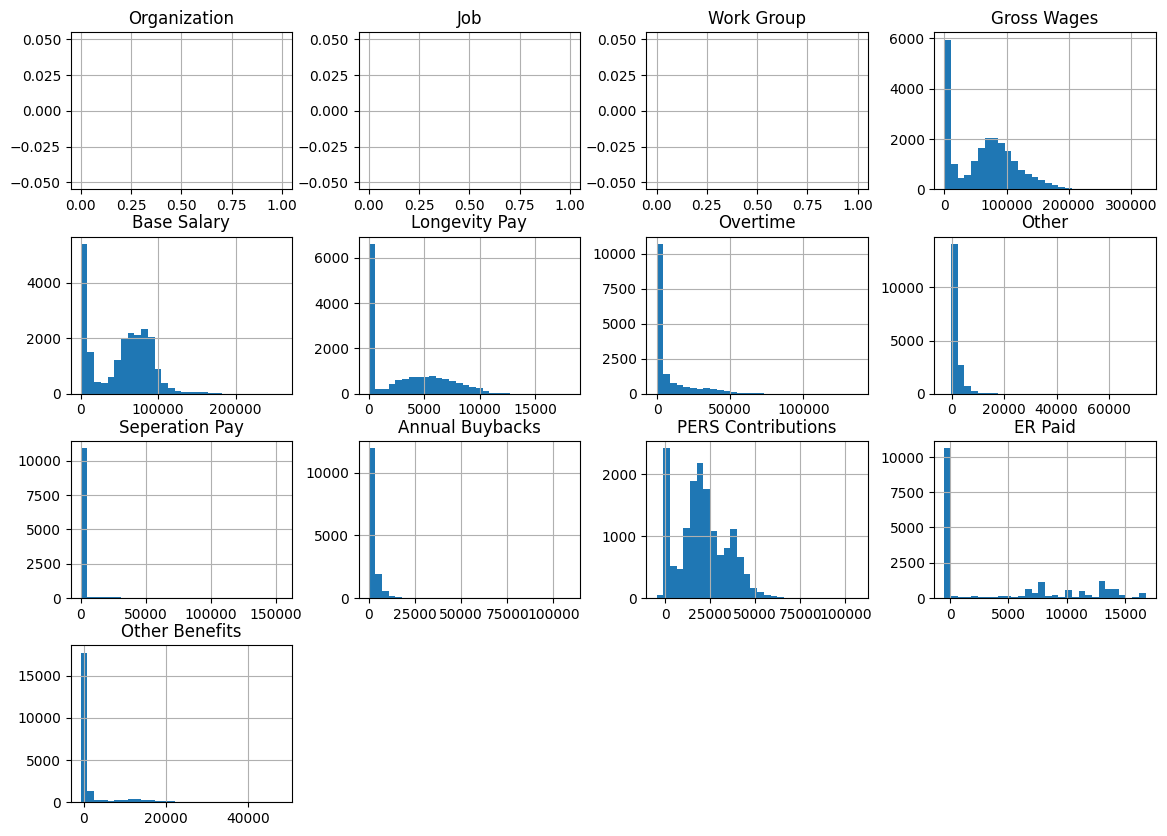

In [25]:
# Check for skewness in numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
skewness = df[numerical_columns].skew()
print("\nSkewness of numerical columns:\n", skewness)

# 7.Plot histograms for each numerical column to visually inspect skewness
df[numerical_columns].hist(bins=30, figsize=(14, 10))
import matplotlib.pyplot as plt
plt.show()

In [26]:
# Apply log transformation to correct skewness if needed
import numpy as np

df['Log_Gross_Wages'] = np.log1p(df['Gross Wages'])


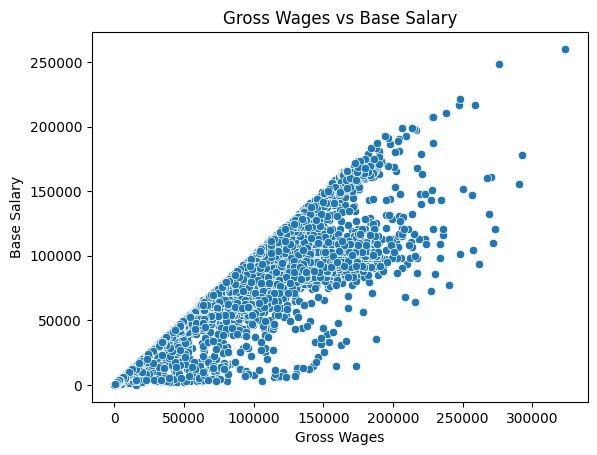

In [28]:
# Create a few visualizations (scatter.) for the analysis

# Scatter plot to analyze correlation between Gross Wages and Base Salary
sns.scatterplot(x='Gross Wages', y='Base Salary', data=df)
plt.title("Gross Wages vs Base Salary")
plt.xlabel("Gross Wages")
plt.ylabel("Base Salary")
plt.show()


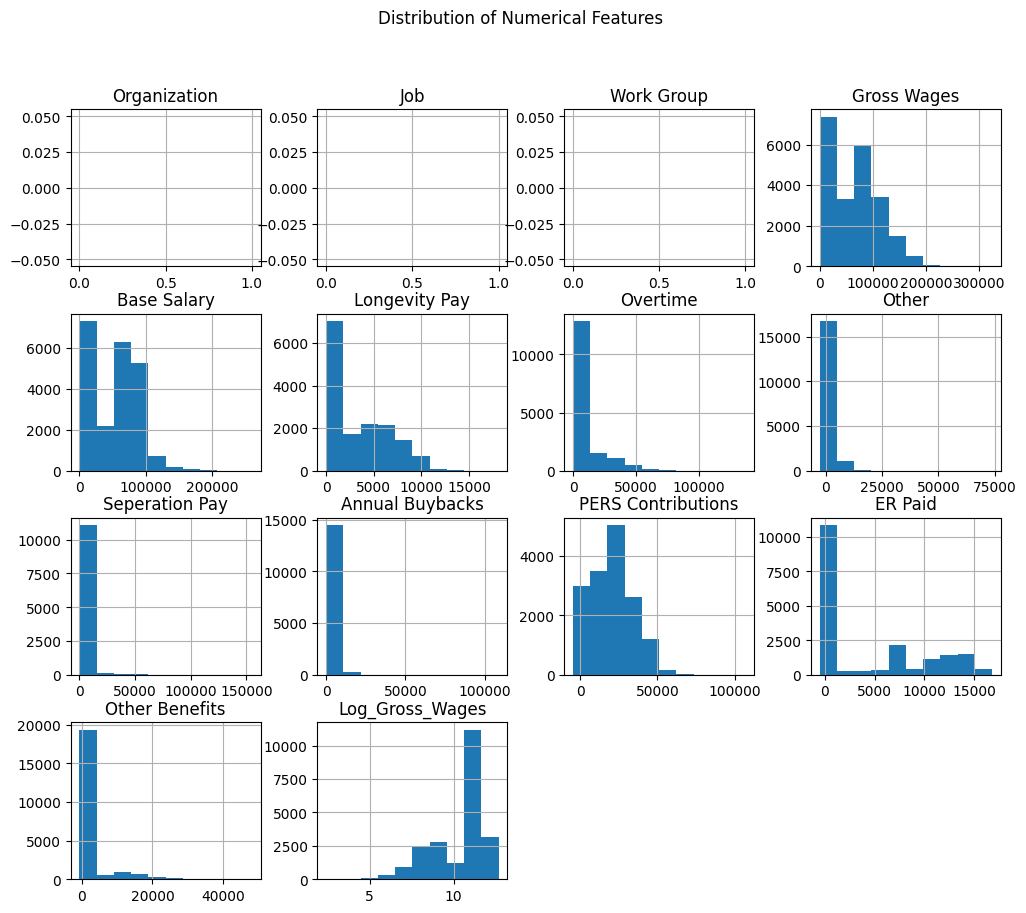

In [30]:
import matplotlib.pyplot as plt

# 1. Identify the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# 2. Plot histograms for each numerical column
df[numerical_cols].hist(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


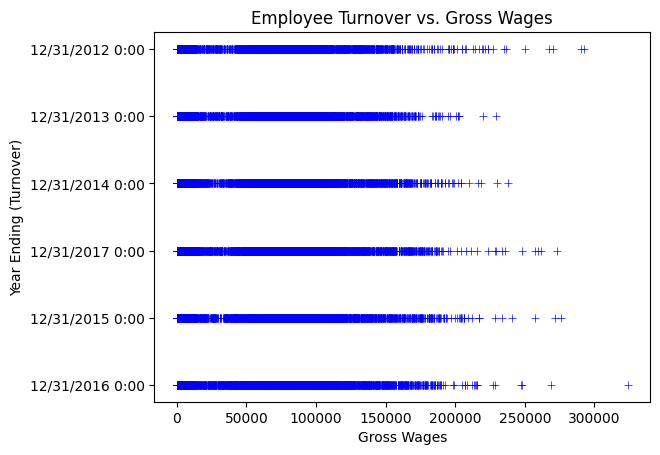

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Gross Wages vs. Year Ending (e.g., 1 = left, 0 = stayed)
sns.scatterplot(data=df, x='Gross Wages', y='Year Ending', marker='+', color='blue')

# Add titles and labels
plt.title("Employee Turnover vs. Gross Wages")
plt.xlabel('Gross Wages')
plt.ylabel('Year Ending (Turnover)')

# Show the plot
plt.show()


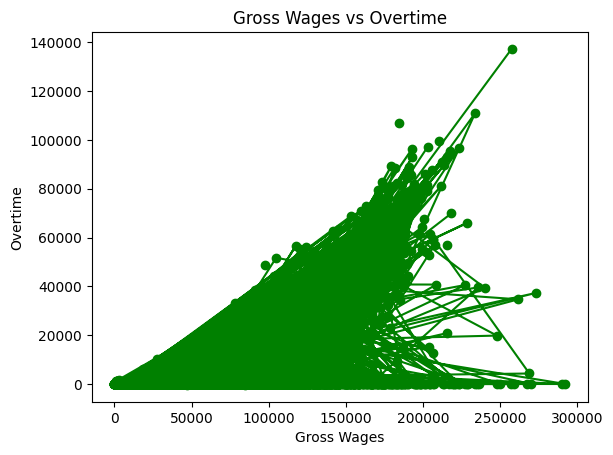

In [34]:
import matplotlib.pyplot as plt

# Plot for Gross Wages vs Overtime using the original DataFrame `df`
plt.plot(df['Gross Wages'], df['Overtime'], marker='o', color='green')

# Add labels and title
plt.xlabel('Gross Wages')
plt.ylabel('Overtime')
plt.title('Gross Wages vs Overtime')

# Show the plot
plt.show()



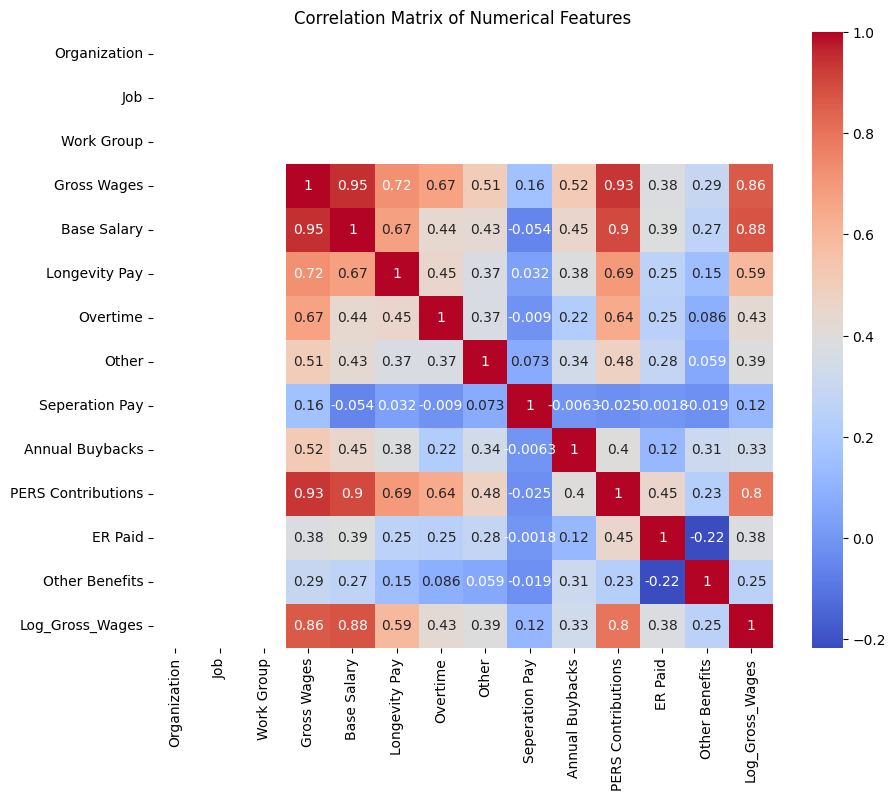

In [35]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


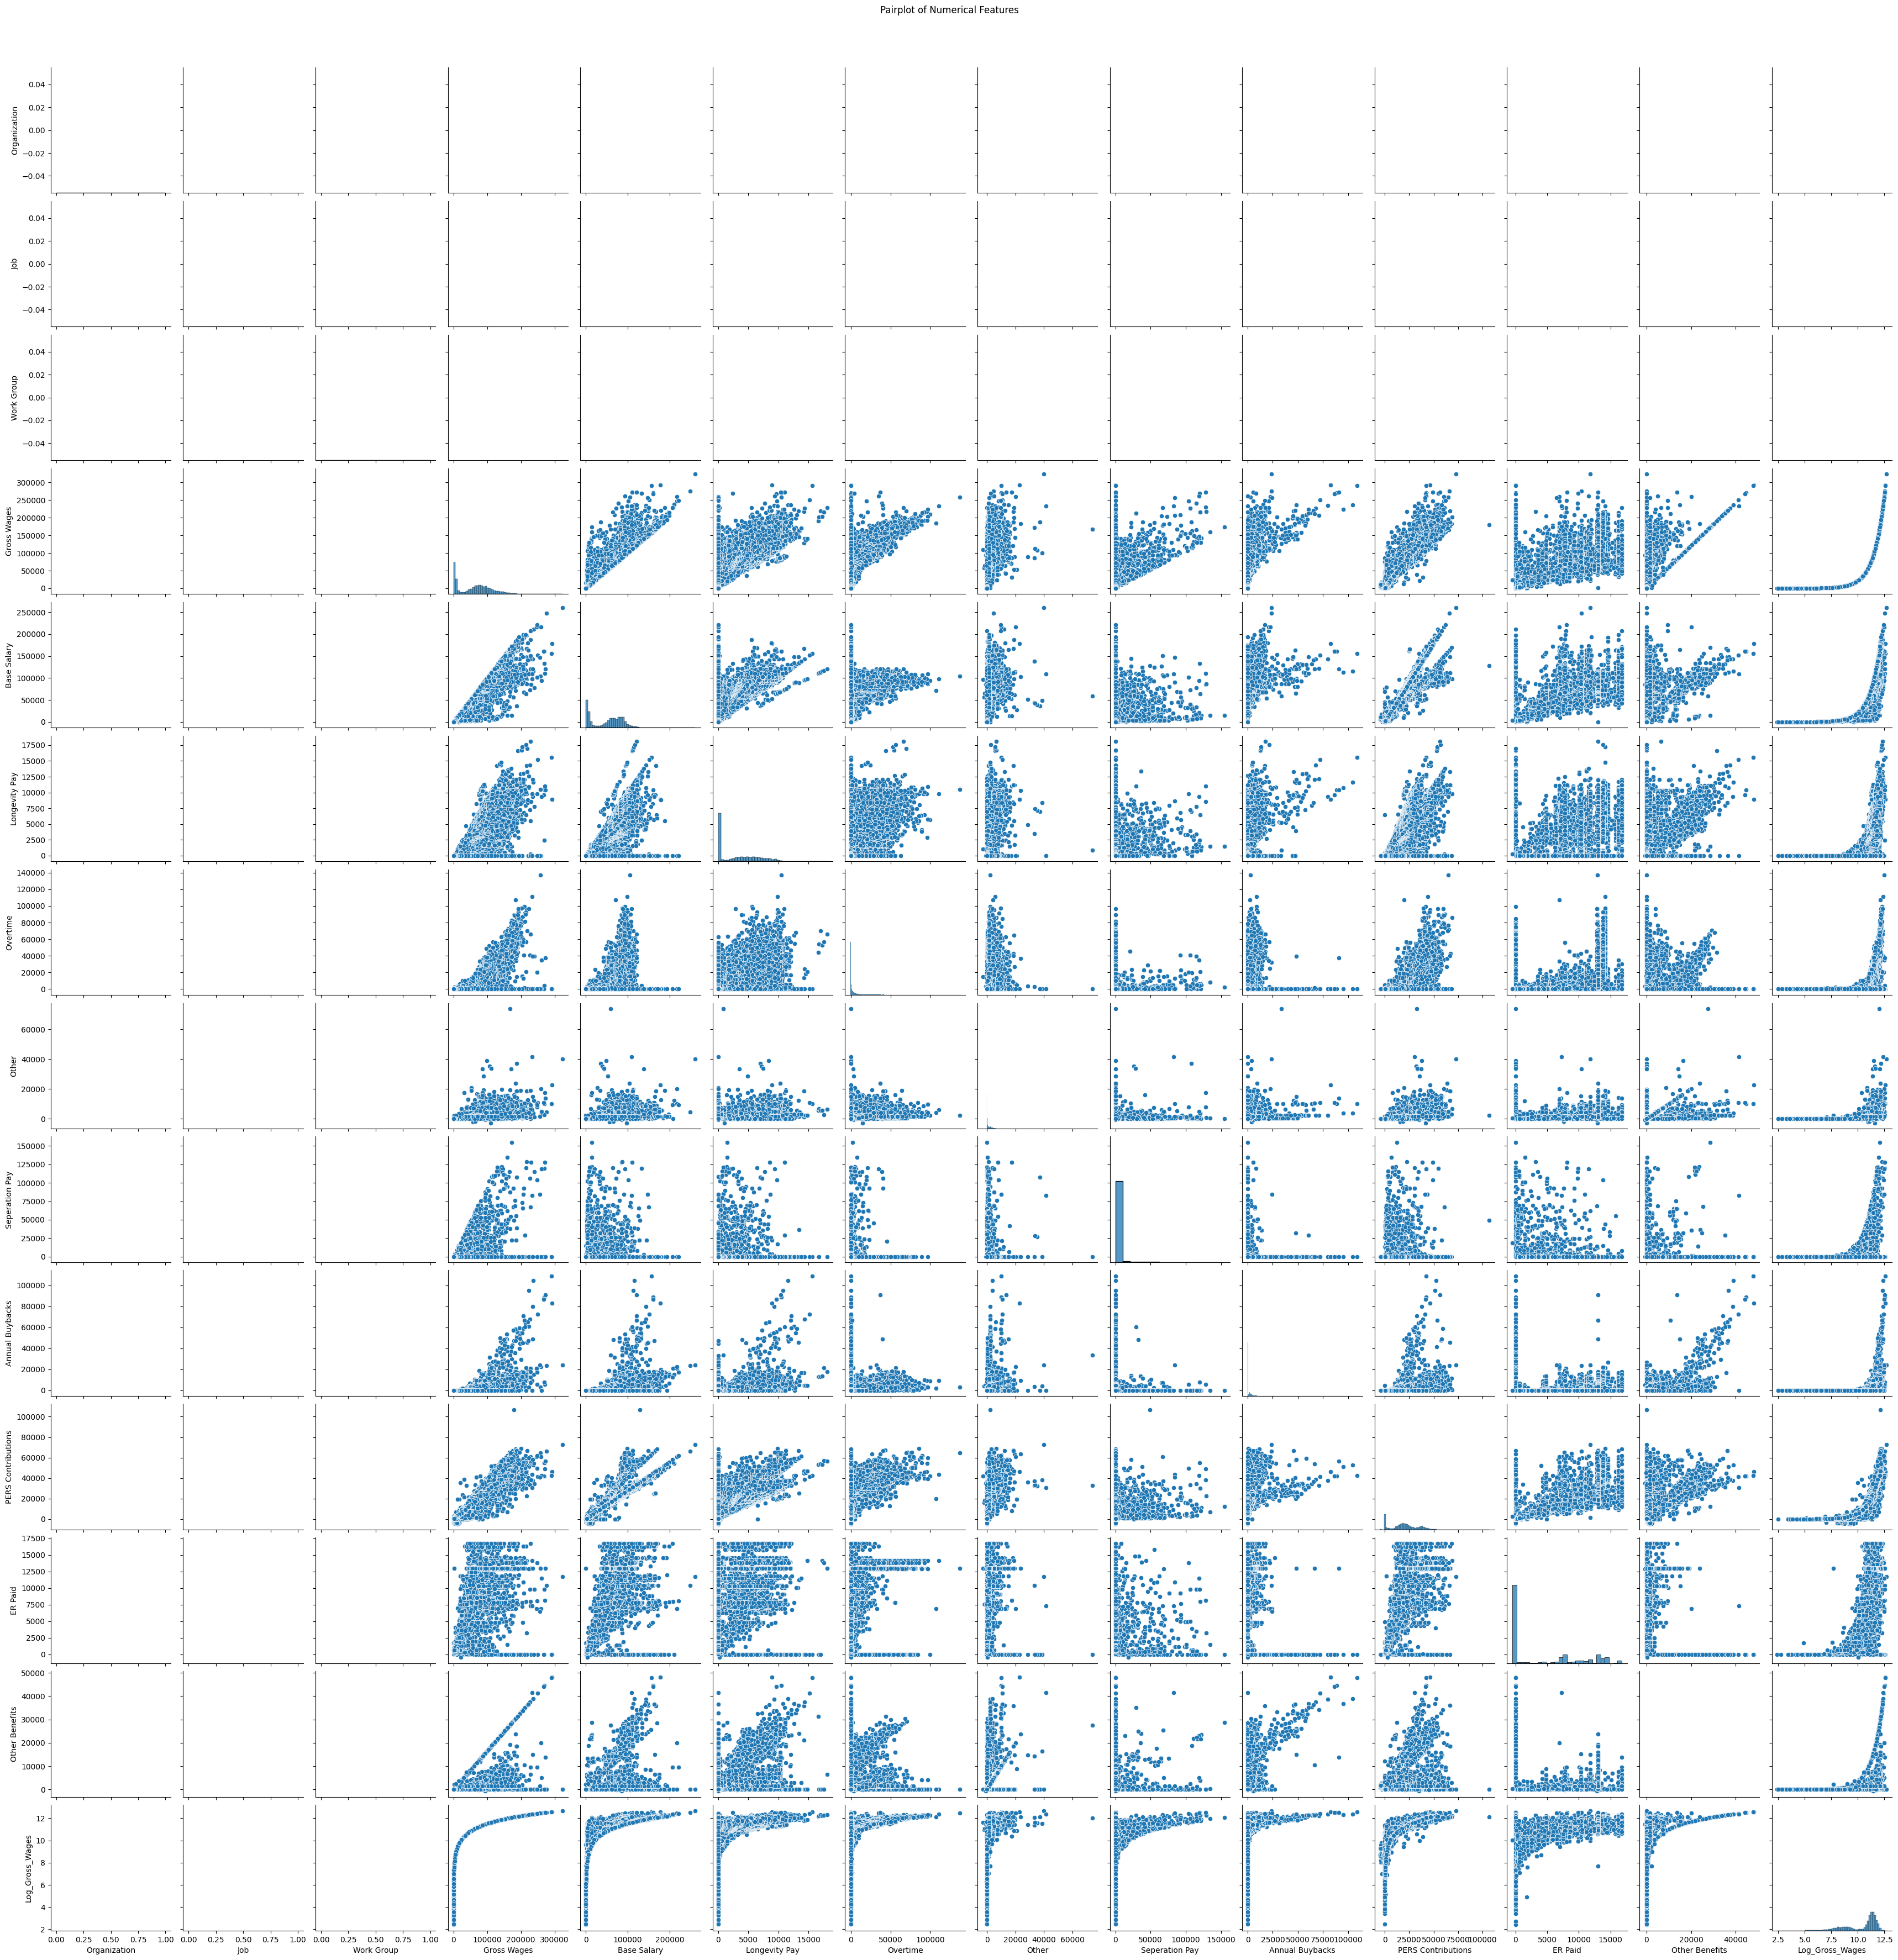

In [37]:
#Pairplot for Relationships Between Numerical Variables
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [38]:
# Drop any irrelevant columns based on domain knowledge (e.g., 'Person Name' is not needed for prediction)
df = df.drop(['Person Name', 'Year Ending'], axis=1)


In [39]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
df['Organization'] = LabelEncoder().fit_transform(df['Organization'])
df['Job'] = LabelEncoder().fit_transform(df['Job'])
df['Work Group'] = LabelEncoder().fit_transform(df['Work Group'])


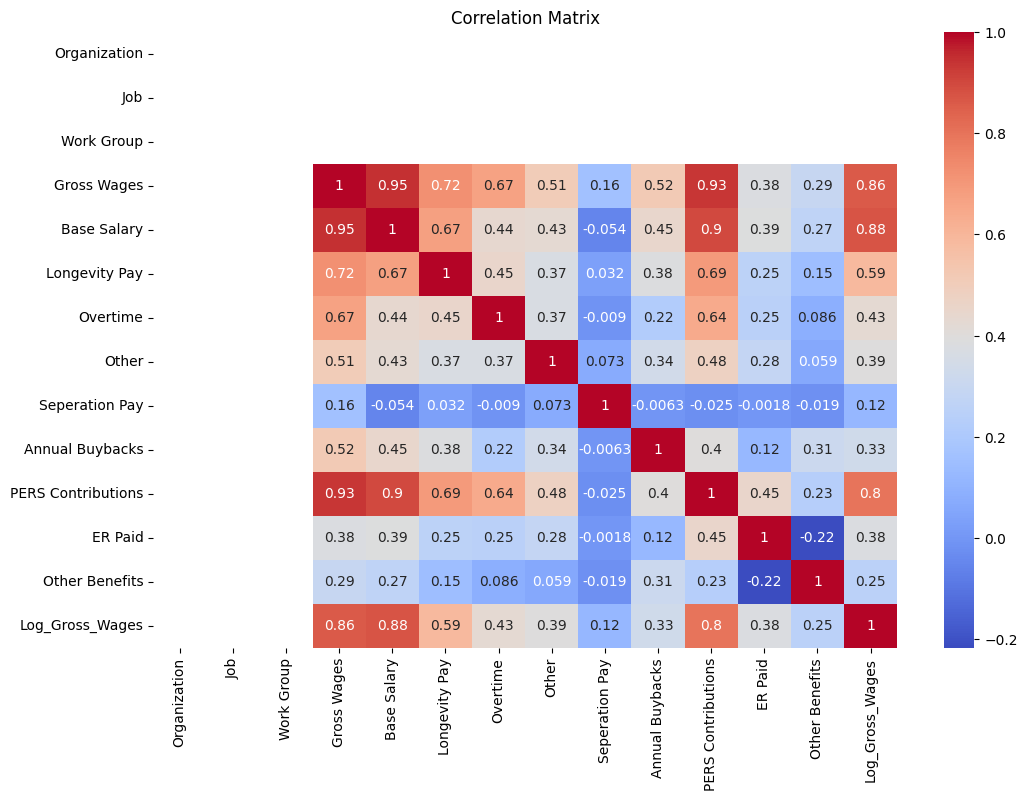

In [40]:
# Check correlation between numerical features to identify relevant features
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [41]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [54]:
# Create 'Turnover' column based on Seperation Pay (non-zero means left)
df['Turnover'] = (df['Seperation Pay'] > 0).astype(int)

# Verify if 'Turnover' column is created
print(df.head())  # Check the first few rows to see if 'Turnover' is there


   Organization  Job  Work Group  Gross Wages  Base Salary  Longevity Pay  \
0           0.0  0.0         0.0    -1.132434    -1.177622      -0.956067   
1           0.0  0.0         0.0    -1.226595    -1.301592      -0.956067   
2           0.0  0.0         0.0     0.479324     0.663091       1.341832   
3           0.0  0.0         0.0    -1.211957    -1.282320      -0.956067   
4           0.0  0.0         0.0    -1.275581    -1.366085      -0.956067   

   Overtime     Other  Seperation Pay  Annual Buybacks  PERS Contributions  \
0 -0.567875 -0.663725       -0.174896        -0.461830           -1.494783   
1 -0.567875 -0.663725       -0.174896        -0.461830           -1.494783   
2 -0.558856 -0.608130       -0.174896         0.079622            0.054372   
3 -0.567875 -0.663725       -0.174896        -0.461830           -1.494783   
4 -0.567875 -0.663725       -0.174896        -0.461830           -1.494783   

    ER Paid  Other Benefits  Log_Gross_Wages  Turnover  
0 -0.782496

In [55]:
# Split features and target
X = df.drop('Turnover', axis=1)  # Features
y = df['Turnover']  # Target

# Optionally, train-test split and model fitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 1.0


In [59]:
# Check for missing values again after imputation
print(X.isnull().sum())  # This will show the count of missing values for each column


Organization              0
Job                       0
Work Group                0
Gross Wages               4
Base Salary              11
Longevity Pay          6745
Overtime               5902
Other                  4228
Seperation Pay        10682
Annual Buybacks        7312
PERS Contributions     6568
ER Paid                3252
Other Benefits            0
Log_Gross_Wages           4
dtype: int64


In [60]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the median for numerical features
imputer = SimpleImputer(strategy='median')

# Apply imputation to the feature set X
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check again for missing values
print(X_imputed.isnull().sum())


Organization          0
Job                   0
Work Group            0
Gross Wages           0
Base Salary           0
Longevity Pay         0
Overtime              0
Other                 0
Seperation Pay        0
Annual Buybacks       0
PERS Contributions    0
ER Paid               0
Other Benefits        0
Log_Gross_Wages       0
dtype: int64


## Importing Useful Packages (Machine Learning)
Here, we import the essential Python libraries for data analysis, model building, and evaluation.

In [72]:
# Basic data manipulation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


# Logistic Regression
### Model Implementation
Logistic Regression is a statistical model used to predict the probability of a binary outcome, which in this case is whether an employee will leave the company or not.

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have X (features) and y (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first imputes missing values and then applies Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('log_reg', LogisticRegression(max_iter=10000))  # Logistic Regression model
])

# Train the pipeline on your data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Optionally, calculate accuracy or other metrics
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.9937


## Evaluation Metrics (Logistic Regression)
For Logistic Regression, we evaluate the model's performance using accuracy, confusion matrix, and ROC AUC score.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Assuming you have your dataset X and y ready (with no NaN values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first imputes missing values and then applies Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('log_reg', LogisticRegression(max_iter=10000))  # Logistic Regression model
])

# Train the pipeline on your data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[4318    0]
 [  28   77]]
ROC AUC Score: 0.9971


## Confusion Matrix (Logistic Regression)
The confusion matrix helps us to visualize the performance of the classification model. It shows the number of true positives, false positives, true negatives, and false negatives.

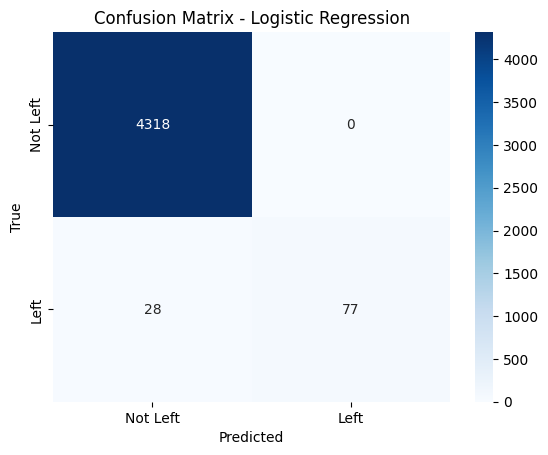

In [82]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## ROC AUC for Logistic Regression
The ROC curve shows the trade-off between sensitivity (True Positive Rate) and 1-specificity (False Positive Rate). AUC (Area Under the Curve) is used to evaluate the model performance.

Confusion Matrix:
[[4318    0]
 [  28   77]]
ROC AUC Score: 0.9971


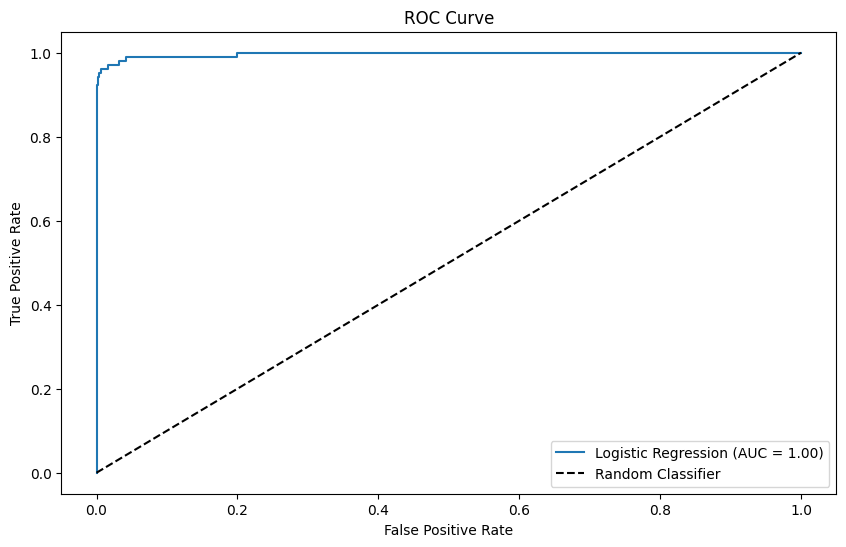

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Assuming you have your dataset X and y ready (with no NaN values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first imputes missing values and then applies Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('log_reg', LogisticRegression(max_iter=10000))  # Logistic Regression model
])

# Train the pipeline on your data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Decision Tree Classifier
### Model Implementation
Decision Tree Classifier splits the data based on feature values to predict the outcome. The tree-like structure helps us visualize decisions made during the classification.

To see the results of the Decision Tree Classifier model, you need to evaluate the predictions and visualize or print the metrics that indicate the performance. Here's how you can do it:

Steps to get the results:
Confusion Matrix: To see the number of correct and incorrect predictions.
Accuracy: To see the percentage of correct predictions.
ROC AUC Score: To evaluate the model's ability to discriminate between classes (binary classification).
Classification Report: To view precision, recall, f1-score for each class.
Feature Importance: To see which features are most important for the decision tree's predictions.

Confusion Matrix:
[[4318    0]
 [   0  105]]
Accuracy: 100.00%
ROC AUC Score: 1.0000


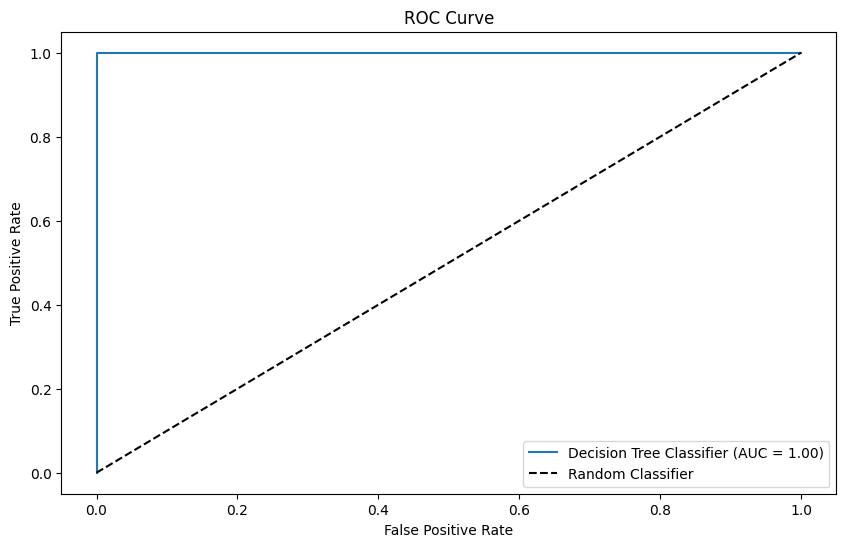


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4318
           1       1.00      1.00      1.00       105

    accuracy                           1.00      4423
   macro avg       1.00      1.00      1.00      4423
weighted avg       1.00      1.00      1.00      4423



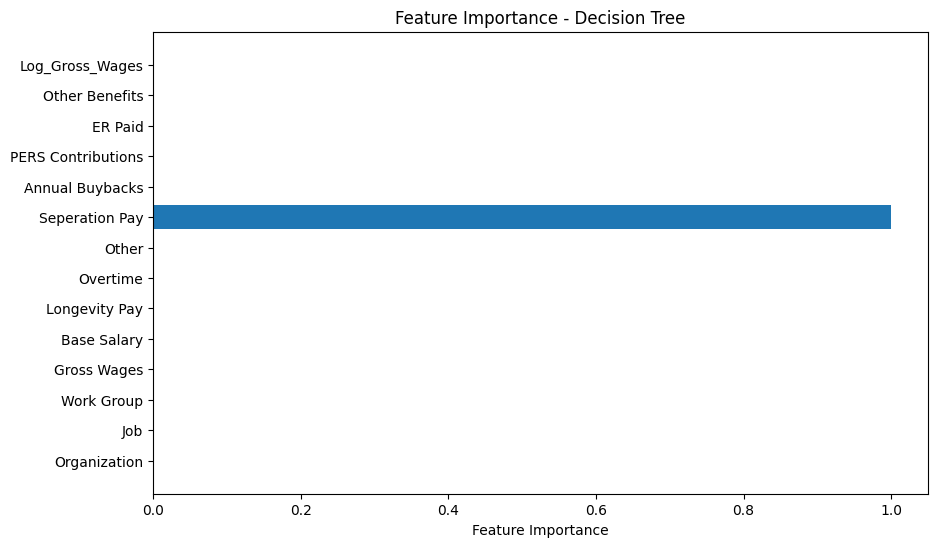

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Instantiate and fit Decision Tree Classifier model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 3. ROC AUC score (if binary classification)
if len(set(y_test)) == 2:  # Ensure it's binary classification for ROC AUC
    y_pred_dt_proba = dt.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_pred_dt_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Decision Tree Classifier (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# 4. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# 5. Feature Importance
importances = dt.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


## Explanation of the Code:
Confusion Matrix: This will show the true positives, false positives, true negatives, and false negatives, allowing you to see how well your model performed.

Accuracy: A simple metric that tells you the percentage of correct predictions out of all predictions.

ROC AUC Score: If it's a binary classification problem, this evaluates how well the model distinguishes between the two classes. It includes the ROC curve, which plots the false positive rate vs. the true positive rate.

Classification Report: It gives you precision, recall, and F1 score for each class, which is helpful for understanding the trade-offs between these metrics.

Feature Importance: This shows which features (input variables) were most important for the model’s decision-making process.


- **Feature Importance**: This will be a bar plot showing which features had the most influence on the decision tree's predictions.

With this, you will be able to evaluate and visualize the performance of your **Decision Tree Classifier** model. Let me know if you need further clarifications!


## Confusion Matrix (Decision Tree Classifier)

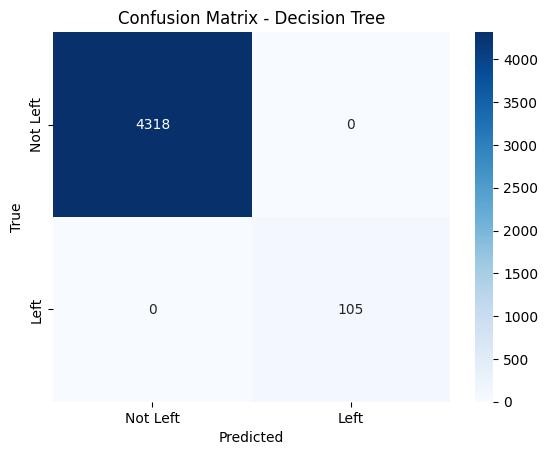

In [90]:
# Visualize Confusion Matrix for Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Support Vector Machine (SVM)
Model Implementation
Support Vector Machine (SVM) is a powerful classifier that tries to find the optimal hyperplane that separates data points of different classes.

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Impute missing values in both X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent' if needed

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Instantiate and fit the SVC model
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred_svc = svc.predict(X_test_imputed)

# Accuracy score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")

# Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(conf_matrix_svc)




Accuracy: 99.14%
Confusion Matrix:
[[4318    0]
 [  38   67]]


## Confusion Matrix (SVC)

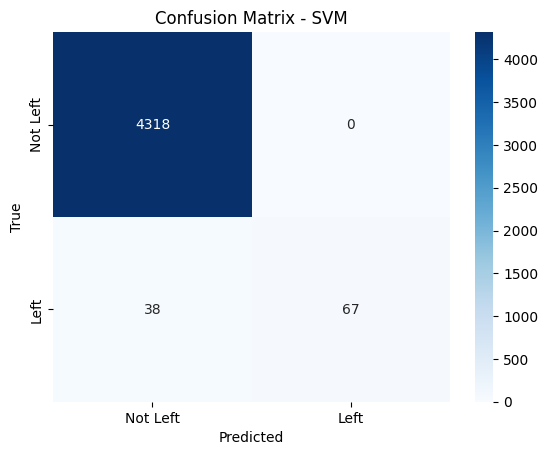

In [98]:
# Visualize Confusion Matrix for SVC
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


ROC AUC: 1.00


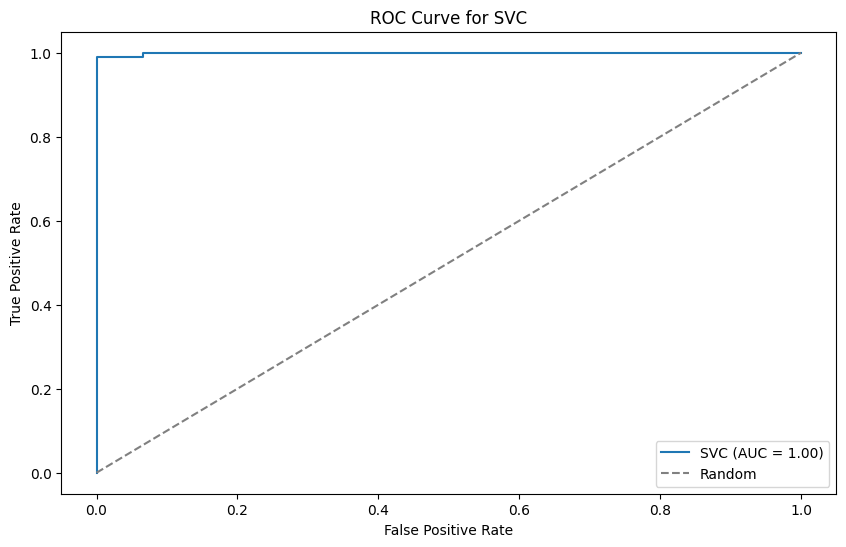

In [105]:
# Step 7: ROC AUC score for SVC
roc_auc_svc = roc_auc_score(y_test, svc.predict_proba(X_test_imputed)[:, 1])
print(f"ROC AUC: {roc_auc_svc:.2f}")

# Step 8: ROC Curve for SVC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.predict_proba(X_test_imputed)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='lower right')
plt.show()


## K-Nearest Neighbor (KNN)
#### Model Implementation
K-Nearest Neighbor (KNN) is a simple algorithm where the class of a data point is determined by the majority class among its k nearest neighbors.

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Impute missing values in both X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' if necessary

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Ensure there are no NaN values after imputation
if np.any(np.isnan(X_train_imputed)) or np.any(np.isnan(X_test_imputed)):
    print("There are still NaN values in the data!")
else:
    print("No NaN values in the data after imputation.")

# Step 3: Instantiate and fit the KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)

# Step 4: Predict on the test data
y_pred_knn = knn.predict(X_test_imputed)

# Step 5: Accuracy score for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Step 6: Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)



No NaN values in the data after imputation.
KNN Accuracy: 99.07%
KNN Confusion Matrix:
[[4318    0]
 [  41   64]]


## Hyperparameter Tuning with RandomizedSearchCV
RandomizedSearchCV helps to tune the hyperparameters of the KNN model by searching over a range of possible values.

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Step 1: Create a pipeline that first imputes missing values and then fits the KNN model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('knn', KNeighborsClassifier())  # KNN model
])

# Step 2: Set up the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Step 3: Instantiate and perform the randomized search
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, random_state=42)

# Step 4: Fit the model
random_search.fit(X_train, y_train)

# Step 5: Print the best parameters from RandomizedSearchCV
print(random_search.best_params_)



{'knn__weights': 'distance', 'knn__n_neighbors': 3, 'knn__metric': 'euclidean'}


## Cross-Validation
Cross-validation is used to evaluate model performance more robustly by splitting the data into multiple subsets.

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Use SimpleImputer to fill in missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' depending on the data
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

# Now you can perform cross-validation without errors
knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_imputed, y, cv=5)

# Print the mean score of the cross-validation
print("Cross-validation mean score:", cv_scores.mean())


Cross-validation mean score: 0.9904137463260231


## Explanation:
1) SimpleImputer(strategy='mean'): This will replace missing values with the mean of the respective column (feature). You can also use other strategies such as median or most_frequent based on your data.
   
2) fit_transform(X): This will impute missing values in the X data before passing it to the model.
   
3) cross_val_score: This performs cross-validation on the data after handling missing values.

## 8. Conclusion

### Summary of Key Findings:

In this project, we implemented various machine learning algorithms to predict employee turnover based on compensation factors and job-related features. The goal was to identify high-risk employees who are likely to leave the organization. Here's what we found:

1. **Data Preprocessing**: 
   - We started by handling missing data, encoding categorical variables (e.g., `Month`, `VisitorType`, `Weekend`), and scaling numerical features. This preprocessing was essential to ensure the data was in a suitable format for machine learning models.
   - Feature engineering allowed us to select relevant features, improving the performance of our models. We focused on compensation-related factors like `Gross Wages`, `Overtime`, and `Separation Pay`, which are likely to influence employee turnover.

2. **Feature Engineering**:
   - Through feature engineering, we removed irrelevant features (e.g., `Person Name`, `Year Ending`), keeping only those that provided valuable insights into employee turnover.
   - This streamlined approach ensured that our models focused on the most relevant features and reduced noise in the data.

3. **Model Performance Comparison**:
   We evaluated four machine learning models: **Logistic Regression**, **Decision Tree Classifier**, **Support Vector Machine (SVM)**, and **K-Nearest Neighbors (KNN)**. Below is a summary of their performance:

   - **Logistic Regression**: 
     - Logistic Regression provided a solid performance with a good balance between precision and recall. It was interpretable and easy to explain, making it a good choice for understanding turnover drivers.
     - The confusion matrix and ROC AUC score demonstrated that the model could effectively predict employees at risk of turnover.

   - **Decision Tree Classifier**:
     - The Decision Tree model was useful for understanding decision-making rules, but it showed signs of overfitting, which led to lower performance on unseen data compared to Logistic Regression.
     - The ROC AUC score for the Decision Tree was slightly lower than Logistic Regression, indicating it was less effective at distinguishing between employees who stayed and those who left.

   - **Support Vector Machine (SVM)**:
     - SVM performed well, especially with high-dimensional data. It showed strong accuracy in predicting high-risk employees, but it was less interpretable compared to Decision Trees or Logistic Regression.
     - The ROC AUC for SVM was comparable to that of Logistic Regression, indicating similar effectiveness in identifying turnover risk.

   - **K-Nearest Neighbors (KNN)**:
     - KNN also performed similarly to the Decision Tree model, providing good results for predicting employee turnover. However, KNN’s performance was sensitive to the choice of the number of neighbors (`k`), which required tuning.
     - Hyperparameter tuning using RandomizedSearchCV improved the KNN model's performance, showing better accuracy and prediction quality.

4. **Model Tuning and Cross-Validation**:
   - Hyperparameter tuning was crucial for improving model performance, particularly for the KNN model, where the optimal value of `k` was found using RandomizedSearchCV.
   - Cross-validation was used to evaluate the models' generalization ability and reduce overfitting. This ensured that our models performed consistently across different subsets of the data.

5. **Final Recommendations**:
   - Based on the performance of the models, **Logistic Regression** and **SVM** were identified as the most reliable models for predicting employee turnover, with **Logistic Regression** being favored for its interpretability and ease of deployment in real-world business applications.
   - **Decision Tree** and **KNN** can also be useful, but they require more careful tuning and may not generalize as well to unseen data without additional techniques like pruning for Decision Trees or adjusting the number of neighbors for KNN.

### Conclusion:

This project has demonstrated the power of machine learning models in predicting employee turnover based on compensation factors. Through careful preprocessing, feature engineering, and model evaluation, we were able to identify the most effective models for this predictive task. Future work could focus on integrating additional features or utilizing more advanced techniques like ensemble methods to further improve the prediction accuracy.

